In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# ! pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

In [4]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

# btc = yf.Ticker("BTC-USD")
# df_btc = yf.download(tickers="BTC-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675


In [6]:
df_xmr.shift(-1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,121.344002,121.665001,101.757004,105.585999,105.585999,84614000.0
2017-11-10,105.750000,127.106003,103.877998,119.615997,119.615997,107708000.0
2017-11-11,119.597000,133.675003,110.617996,123.856003,123.856003,144948000.0
2017-11-12,128.960007,136.528000,120.921997,123.402000,123.402000,116200000.0
2017-11-13,123.615997,124.200996,118.625999,122.352997,122.352997,53544800.0
...,...,...,...,...,...,...
2023-10-13,153.583801,154.282990,151.850967,152.833160,152.833160,33344438.0
2023-10-14,152.833466,153.465881,152.173126,152.448990,152.448990,31895675.0
2023-10-15,152.437531,153.522949,151.155411,152.544098,152.544098,64382308.0


# Make Label


In [7]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

##### method1


In [8]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1


##### method2


In [9]:
# def make_target(row):
#     diff = row["Close_difference"]
#     n = 1
#     if diff >= n:
#         return 1
#     if diff <= -n:
#         return -1
#     return 0


# df["Label"] = df.apply(make_target, axis=1)
# df.drop("Close_difference", axis=1, inplace=True)
# df

In [10]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2164,2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0


### Change Features


In [11]:
# df["Variance"] = df["High"] - df["Low"]
# df

In [12]:
df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
df

,Date,Close,Volume,Label
0,2017-11-09,120.779999,86864600,0
1,2017-11-10,105.585999,84614000,1
2,2017-11-11,119.615997,107708000,1
3,2017-11-12,123.856003,144948000,0
4,2017-11-13,123.402000,116200000,0
...,...,...,...,...
2164,2023-10-13,153.590515,51282283,0
2165,2023-10-14,152.833160,33344438,0
2166,2023-10-15,152.448990,31895675,1
2167,2023-10-16,152.544098,64382308,0


# Divide Our Data


In [13]:
# def train_test_split_by_date(
#     df: pd.DataFrame,
#     start_date_train: str,
#     end_date_train: str,
#     start_date_test: str,
#     end_date_test: str,
#     divide_X_y: bool = True,
# ):
#     df_train = df[
#         (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
#     ].reset_index(drop=True)

#     df_test = df[
#         (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
#     ].reset_index(drop=True)

#     if divide_X_y:
#         X_train = df_train.drop(columns=["Label"])
#         y_train = df_train["Label"]

#         X_test = df_test.drop(columns=["Label"])
#         y_test = df_test["Label"]
#         return X_train, X_test, y_train, y_test

#     return df_train, df_test

In [14]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [15]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

df_train_test = df[
    (df["Date"] >= start_date_train_test) & (df["Date"] <= end_date_train_test)
].reset_index(drop=True)
df_train_test

,Date,Close,Volume,Label
0,2017-11-09,120.779999,86864600,0
1,2017-11-10,105.585999,84614000,1
2,2017-11-11,119.615997,107708000,1
3,2017-11-12,123.856003,144948000,0
4,2017-11-13,123.402000,116200000,0
...,...,...,...,...
2154,2023-10-03,147.151352,49389643,1
2155,2023-10-04,150.469055,59400400,0
2156,2023-10-05,149.623718,55704972,1
2157,2023-10-06,151.992264,49535004,1


# Devide Test Data


In [16]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
df_test

,Date,Close,Volume,Label
0,2023-09-08,143.886154,46927009,0
1,2023-09-09,143.406815,35896666,0
2,2023-09-10,142.894440,33705148,0
3,2023-09-11,139.930466,58031716,1
4,2023-09-12,140.804672,57433672,1
5,2023-09-13,143.115967,54374646,1
6,2023-09-14,146.329483,44084896,1
7,2023-09-15,147.350723,57280169,0
8,2023-09-16,144.624649,34872985,1
9,2023-09-17,145.797852,31255846,0


# Plots


### Stock Chart Plot


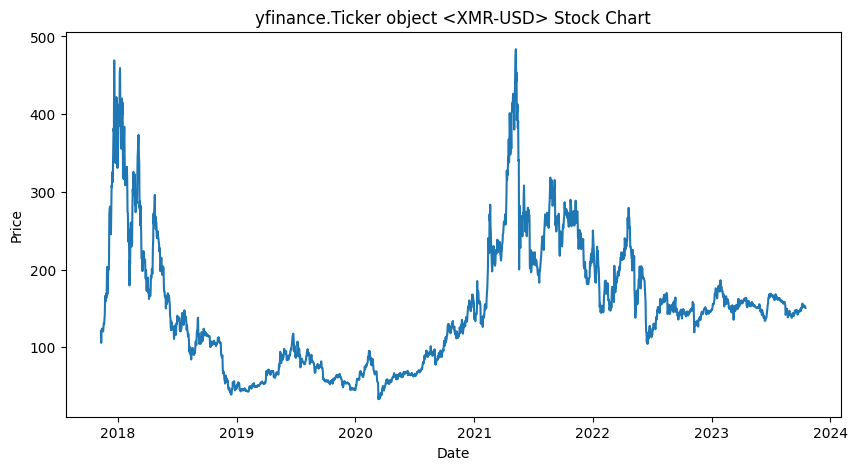

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df_xmr["Close"])
plt.title(f"{xmr} Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### candlestick


In [18]:
# ! pip install mplfinance

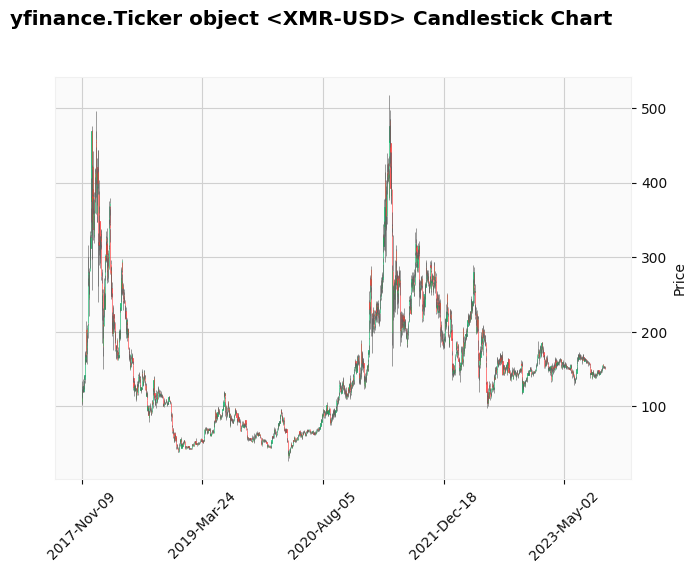

In [19]:
import mplfinance as mpf

mpf.plot(df_xmr, type="candle", style="yahoo", title=f"{xmr} Candlestick Chart")

# Feature Engineering


### Check Missing Values


In [20]:
df_train_val.isna().sum()

Date      0
Close     0
Volume    0
Label     0
dtype: int64

### Outlier


##### drop ountliers, Z-Score method


In [21]:
def drop_outliers_zScore(data, threshold=3):
    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
    print((np.abs(z_scores) < threshold).all(axis=1).sum())
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

In [22]:
# drop_outliers_zScore(df_train_val)

##### drop outliers with LocalOutlierFactor


In [23]:
from sklearn.neighbors import LocalOutlierFactor


def drop_outliers_LOF(data: pd.DataFrame):
    clf = LocalOutlierFactor(n_neighbors=10, contamination=0.05)  # 0.03, 0.05

    # Fit the data to the model
    y_pred = clf.fit_predict(data.iloc[:, :-1])

    # Identify the outliers
    outliers = np.where(y_pred == -1)

    return data.drop(outliers[0])

In [24]:
# df_train_val.reset_index(drop=False)

In [25]:
df_train_val.reset_index(drop=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   2129 non-null   int64         
 1   Date    2129 non-null   datetime64[ns]
 2   Close   2129 non-null   float64       
 3   Volume  2129 non-null   int64         
 4   Label   2129 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 83.3 KB


In [26]:
drop_outliers_LOF(df_train_val.reset_index(drop=False).drop("Date", axis=1))

,index,Close,Volume,Label
0,0,120.779999,86864600,0
1,1,105.585999,84614000,1
2,2,119.615997,107708000,1
3,3,123.856003,144948000,0
4,4,123.402000,116200000,0
...,...,...,...,...
2124,2124,140.839981,49564266,1
2125,2125,141.170868,63835398,0
2126,2126,137.781372,54468002,1
2127,2127,142.113235,67734044,1


# چون داده هامون سری زمانی هستن داده پرت پیدا کردن معنی نداره فکرکنم


### Split Train and Validation Data


In [27]:
# start_date_train = "2017-11-09"
# end_date_train = "2023-08-07"

# start_date_val = "2023-08-08"
# end_date_val = "2023-09-07"

# df_train = df_train_val[
#     (df_train_val["Date"] >= start_date_train)
#     & (df_train_val["Date"] <= end_date_train)
# ].reset_index(drop=True)

# df_validation = df_train_val[
#     (df_train_val["Date"] >= start_date_val) & (df_train_val["Date"] <= end_date_val)
# ].reset_index(drop=True)

# X_train = df_train.drop(columns=["Label"])
# y_train = df_train["Label"]

# X_validation = df_validation.drop(columns=["Label"])
# y_validation = df_validation["Label"]

In [28]:
start_date_train = "2017-11-09"
end_date_train = "2023-08-07"

start_date_val = "2023-08-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [29]:
X_train.head()

,Date,Close,Volume
0,2017-11-09,120.779999,86864600
1,2017-11-10,105.585999,84614000
2,2017-11-11,119.615997,107708000
3,2017-11-12,123.856003,144948000
4,2017-11-13,123.402000,116200000


In [30]:
X_validation.head()

,Date,Close,Volume
0,2023-08-08,158.887863,85841743
1,2023-08-09,157.203140,78453875
2,2023-08-10,155.993378,97252803
3,2023-08-11,156.793015,81873242
4,2023-08-12,157.723282,75281080


In [31]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.6285714285714287

In [32]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.6111111111111112

### Plot Distributions


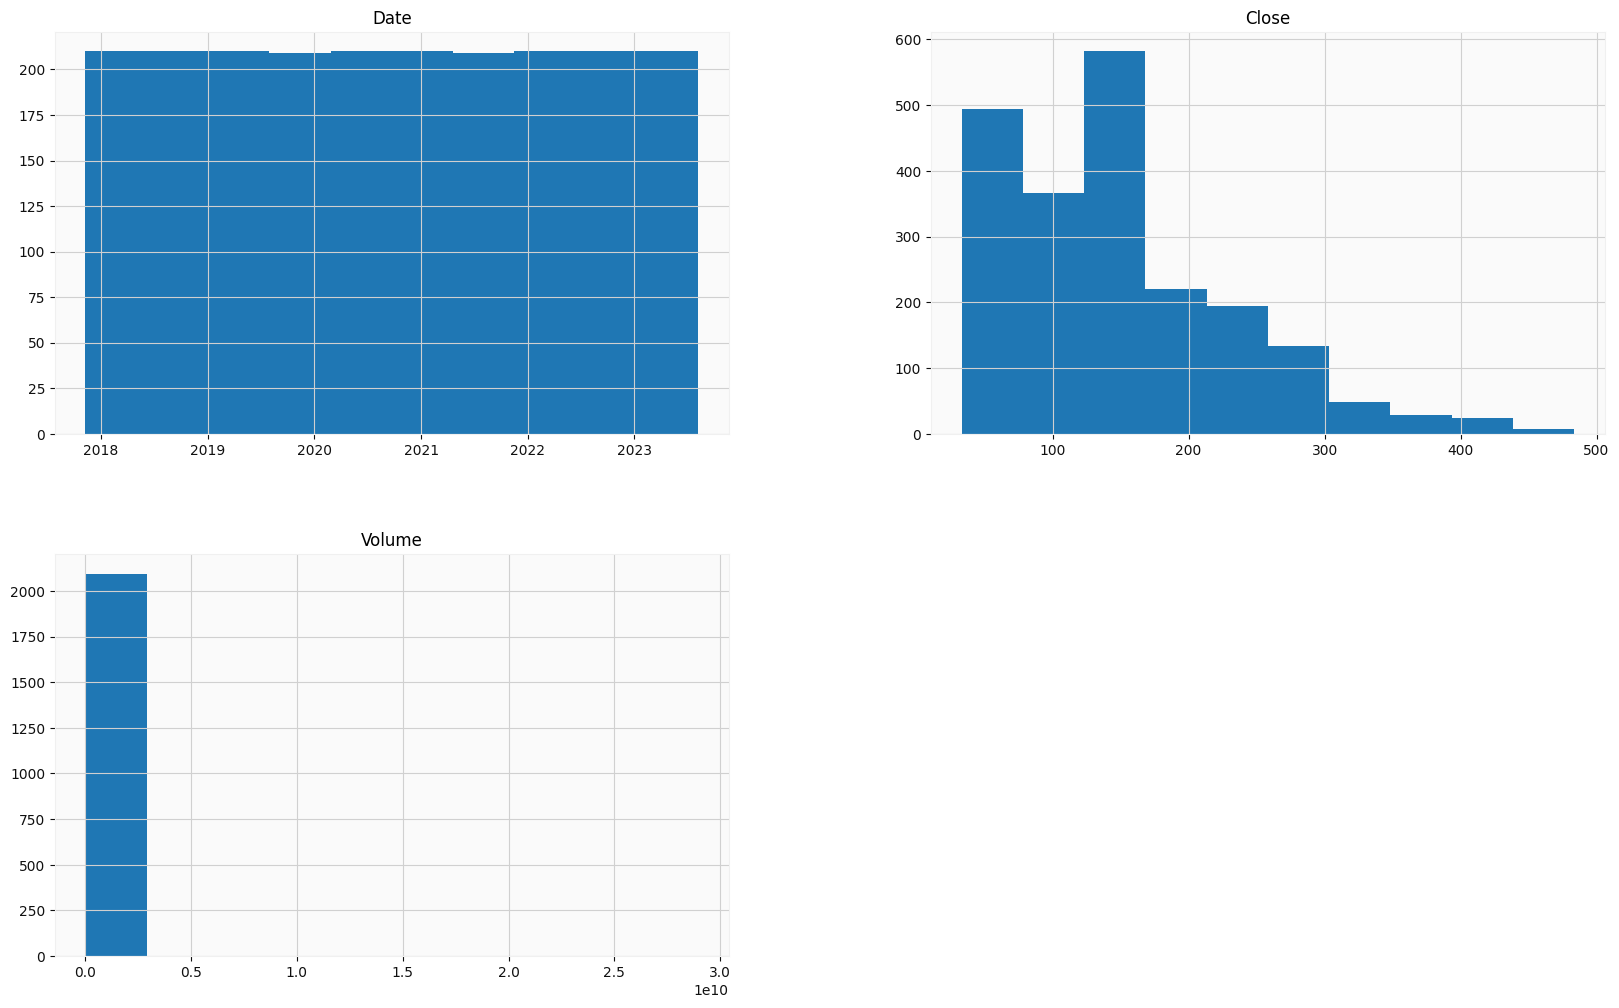

In [33]:
X_train.hist(figsize=[20, 12])
plt.show()

In [34]:
X_train.describe()

,Date,Close,Volume
count,2098,2098.000000,2.098000e+03
mean,2020-09-22 12:00:00,150.118261,2.490891e+08
min,2017-11-09 00:00:00,33.010323,1.016030e+07
25%,2019-04-17 06:00:00,81.971788,6.545999e+07
50%,2020-09-22 12:00:00,143.457558,1.045898e+08
75%,2022-02-28 18:00:00,196.357681,1.930206e+08
max,2023-08-07 00:00:00,483.583618,2.895912e+10
std,NaN,82.800364,1.014184e+09


### Normalizing


##### method 1 : Standard Scaler


In [35]:
X_train_normalized_ss = X_train.copy()
X_validation_normalized_ss = X_validation.copy()

scaler_ss = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [36]:
X_train_normalized_ss.describe()

,Date,Close,Volume
count,2098,2.098000e+03,2098.000000
mean,2020-09-22 12:00:00,-2.709410e-17,0.000000
min,2017-11-09 00:00:00,-1.414678e+00,-0.235643
25%,2019-04-17 06:00:00,-8.232176e-01,-0.181104
50%,2020-09-22 12:00:00,-8.046210e-02,-0.142512
75%,2022-02-28 18:00:00,5.585778e-01,-0.055297
max,2023-08-07 00:00:00,4.028302e+00,28.315257
std,NaN,1.000238e+00,1.000238


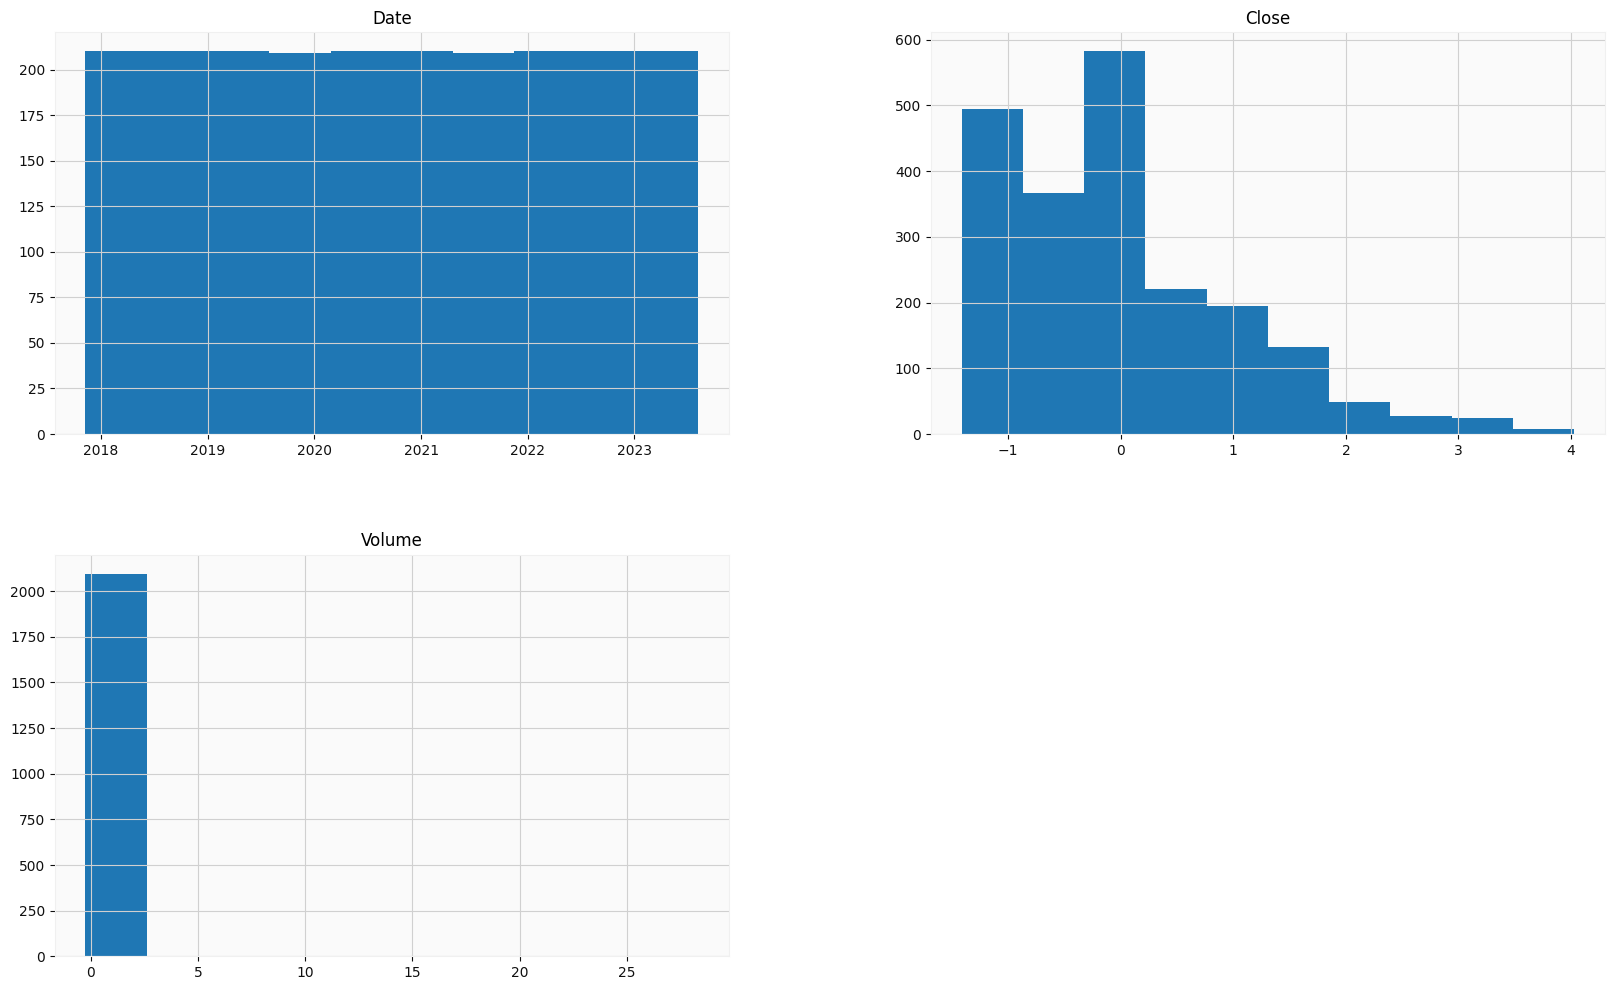

In [37]:
X_train_normalized_ss.hist(figsize=[20, 12])
plt.show()

##### method 2 : Power Transform


In [38]:
X_train_transformed = X_train.copy()
X_validation_transformed = X_validation.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [39]:
X_train_transformed.describe()

,Date,Close,Volume
count,2098,2.098000e+03,2.098000e+03
mean,2020-09-22 12:00:00,1.083764e-16,-9.320370e-15
min,2017-11-09 00:00:00,-2.221810e+00,-2.869403e+00
25%,2019-04-17 06:00:00,-8.107004e-01,-5.249464e-01
50%,2020-09-22 12:00:00,1.538186e-01,-3.696628e-02
75%,2022-02-28 18:00:00,7.283273e-01,5.484932e-01
max,2023-08-07 00:00:00,2.520115e+00,3.686680e+00
std,NaN,1.000238e+00,1.000238e+00


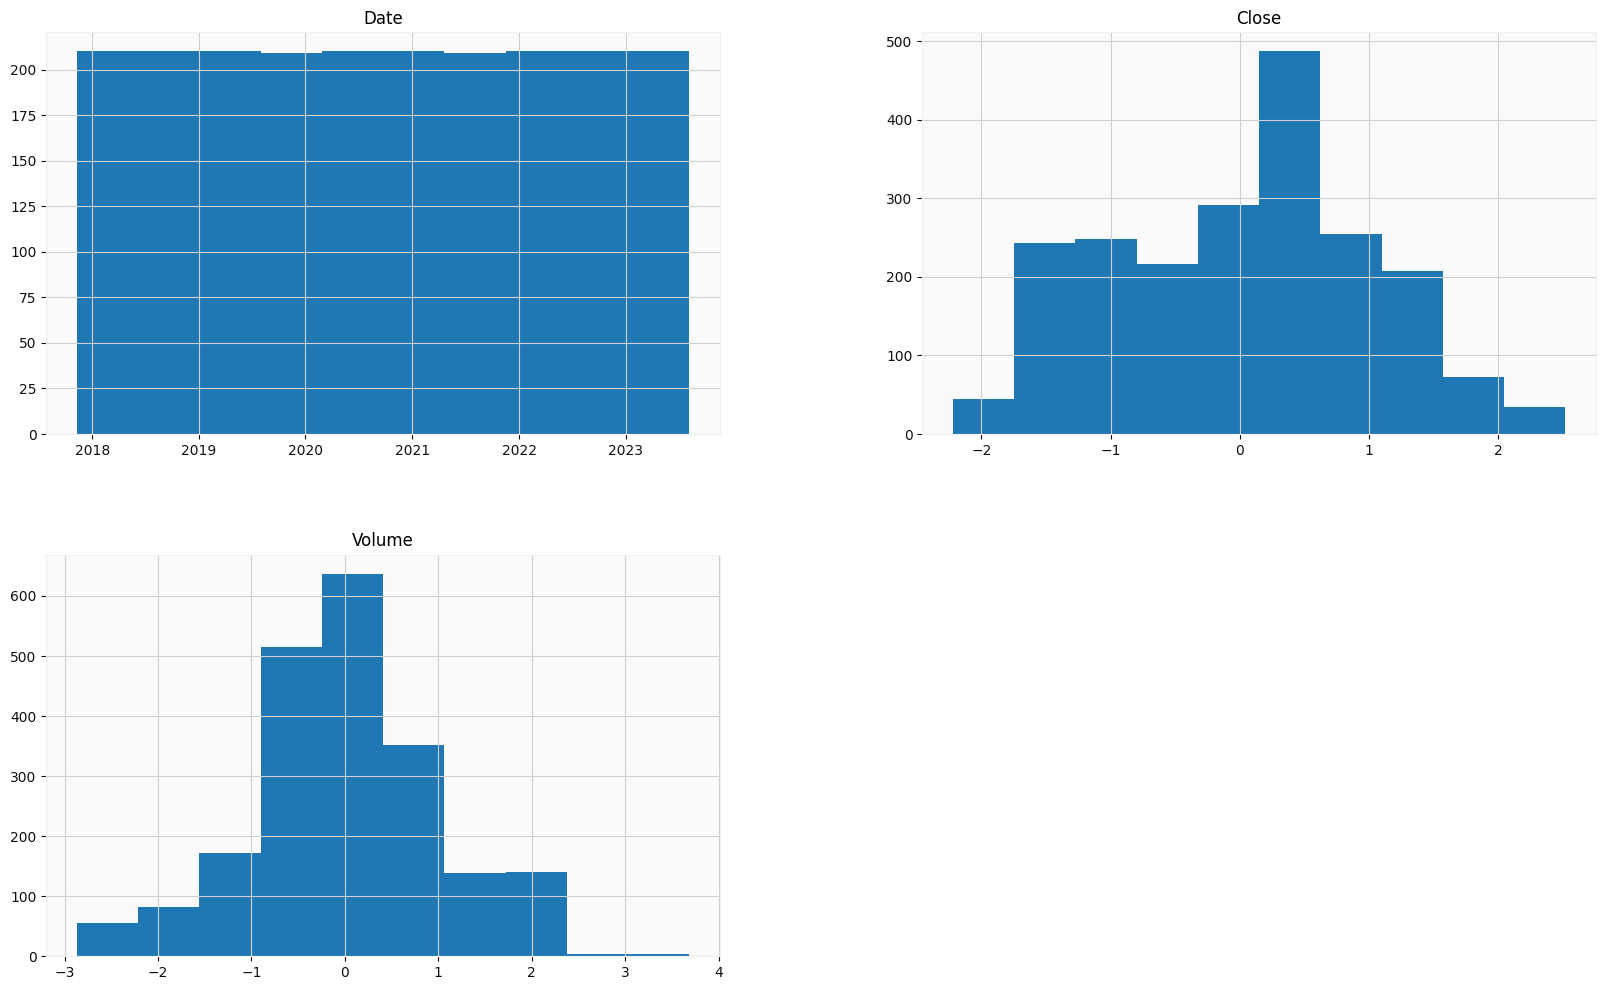

In [40]:
X_train_transformed.hist(figsize=[20, 12])
plt.show()

##### method 3 : Min Max Scaler


In [41]:
X_train_normalized_ms = X_train.copy()
X_validation_normalized_ms = X_validation.copy()

scaler_min_max = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [42]:
X_train_normalized_ms.describe()

,Date,Close,Volume
count,2098,2.098000e+03,2098.000000
mean,2020-09-22 12:00:00,-2.709410e-17,0.000000
min,2017-11-09 00:00:00,-1.414678e+00,-0.235643
25%,2019-04-17 06:00:00,-8.232176e-01,-0.181104
50%,2020-09-22 12:00:00,-8.046210e-02,-0.142512
75%,2022-02-28 18:00:00,5.585778e-01,-0.055297
max,2023-08-07 00:00:00,4.028302e+00,28.315257
std,NaN,1.000238e+00,1.000238


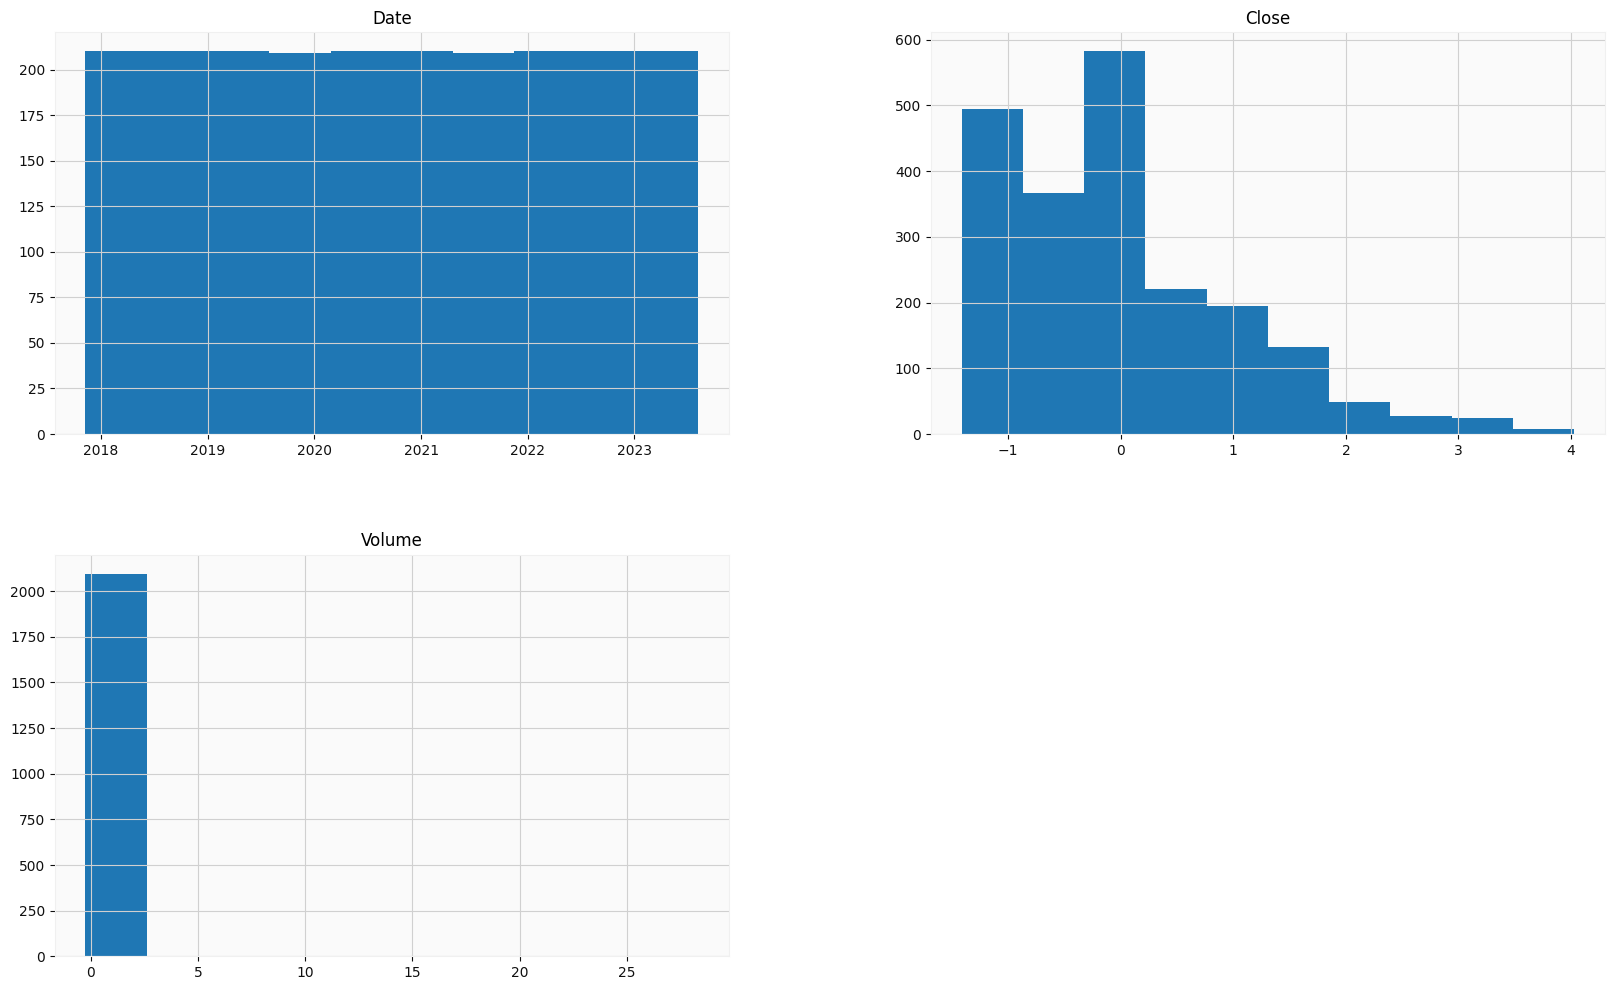

In [43]:
X_train_normalized_ms.hist(figsize=[20, 12])
plt.show()

In [44]:
df_train_val.corr()

,Date,Close,Volume,Label
Date,1.000000,0.163580,0.029405,0.040528
Close,0.163580,1.000000,0.049219,-0.015416
Volume,0.029405,0.049219,1.000000,0.012916
Label,0.040528,-0.015416,0.012916,1.000000


# Modeling and Evaluating


In [45]:
def normalization(X_train, X_test, method):
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    if method == "StandardScaler":
        ss = StandardScaler()
        X_train_normalized[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ss.transform(X_test[X_test.columns])

    if method == "MinMaxScaler":
        ms = MinMaxScaler()
        X_train_normalized[X_train.columns] = ms.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ms.transform(X_test[X_test.columns])

    if method == "PowerTransformer":
        pt = PowerTransformer()
        X_train_normalized[X_train.columns] = pt.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = pt.transform(X_test[X_test.columns])

    return X_train_normalized, X_test_normalized

In [46]:
def evaluation(y_true, y_pred, df_evaluation, df_confusion, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
        "MSE": mse,
    }

    df_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    df_confusion.loc[model_name] = new_record_confusion

    print(confusion)
    print(df_evaluation)

    return df_evaluation, df_confusion

In [92]:
def model_predict(
    df_train_val,
    model,
    test_item,
    normalize=False,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    # if normalize:
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

### Define Evaluation Matrixes


In [48]:
df_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

### Logistic Regression


In [49]:
def logestic_regression(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression(C=1, penalty="l2")
    model_name = "Logistic Regression"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [50]:
logestic_regression(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 13]
 [ 0 18]]
                     Accuracy  Precision  Recall  F1 Score  AUC       MSE
Logistic Regression  0.580645   0.580645       1  0.734694  0.5  0.419355


### Decision Tree


In [51]:
def decision_tree_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth
):
    from sklearn.tree import DecisionTreeClassifier

    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_name = "Decision Tree"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_dt
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [52]:
max_depth = 25
decision_tree_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
)

[[ 6  7]
 [ 5 13]]
                     Accuracy  Precision    Recall  F1 Score      AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.50000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.59188   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  


### SVM


In [53]:
def svm(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.svm import SVC

    model_svm = SVC()
    model_name = "SVM"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    # change Label 0 to -1
    # df["Label"] = df["Label"].replace({0: -1})
    # y_test = y_test.replace({0: -1})

    model_new = model_svm
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    # print(y_pred_list)
    # print(y_test.tolist())

In [104]:
svm(
    df_train_val.copy(), X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 13]
 [ 0 18]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   
Random Forest        0.548387   0.600000  0.666667  0.631579  0.525641   
Gaussian NB          0.580645   0.580645  1.000000  0.734694  0.500000   
Xg Boost             0.387097   0.470588  0.444444  0.457143  0.376068   
Stacking ()          0.612903   0.666667  0.666667  0.666667  0.602564   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  
Random Forest        0.451613  
Gaussian NB     

### AdaBoost


In [55]:
def ada_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(random_state=42)
    model_name = "Ada Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [56]:
ada_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 2 11]
 [ 1 17]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  


### KNN


In [57]:
def knn(
    df, X_test, y_test, df_evaluation, df_confusion, n_neighbors, metric="manhattan"
):
    from sklearn.neighbors import KNeighborsClassifier

    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model_name = "KNN"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_knn
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [58]:
n_neighbors = 13
metric = "manhattan"
knn(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    n_neighbors,
    metric,
)

[[ 4  9]
 [ 3 15]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  


### Random Forest


In [107]:
def random_forest_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth, n_estimators
):
    from sklearn.ensemble import RandomForestClassifier

    model_rf = RandomForestClassifier(
        max_depth=max_depth,
        random_state=42,
        n_estimators=n_estimators,
    )
    model_name = "Random Forest"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_rf
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [109]:
max_depth = 25
n_estimators = 100
random_forest_classifier(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    max_depth,
    n_estimators,
)

[[ 5  8]
 [ 6 12]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   
Random Forest        0.548387   0.600000  0.666667  0.631579  0.525641   
Gaussian NB          0.580645   0.580645  1.000000  0.734694  0.500000   
Xg Boost             0.387097   0.470588  0.444444  0.457143  0.376068   
Stacking ()          0.612903   0.666667  0.666667  0.666667  0.602564   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  
Random Forest        0.451613  
Gaussian NB     

### Gausian


In [61]:
def gaussian_nb(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.naive_bayes import GaussianNB

    model_gnb = GaussianNB(priors=None, var_smoothing=1e-09)
    model_name = "Gaussian NB"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_gnb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=True)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [62]:
gaussian_nb(
    df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val
)

[[ 0 13]
 [ 0 18]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   
Random Forest        0.548387   0.600000  0.666667  0.631579  0.525641   
Gaussian NB          0.580645   0.580645  1.000000  0.734694  0.500000   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  
Random Forest        0.451613  
Gaussian NB          0.419355  


### XGboost


In [63]:
# ! pip install xgboost

In [64]:
def xg_boost(df, X_test, y_test, df_evaluation, df_confusion):
    from xgboost import XGBClassifier

    model_xgb = XGBClassifier(random_state=42)
    model_name = "Xg Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_xgb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [65]:
xg_boost(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 4  9]
 [10  8]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   
Random Forest        0.548387   0.600000  0.666667  0.631579  0.525641   
Gaussian NB          0.580645   0.580645  1.000000  0.734694  0.500000   
Xg Boost             0.387097   0.470588  0.444444  0.457143  0.376068   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  
Random Forest        0.451613  
Gaussian NB          0.419355  
Xg Boost             0.612903  


### Staking Models


In [66]:
# ! pip install mlxtend

In [67]:
def stacking(df, X_test, y_test, df_evaluation, df_confusion):
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from xgboost import XGBClassifier
    from mlxtend.classifier import StackingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC

    model_svm = SVC(probability=True)
    model_lr = LogisticRegression(C=1, penalty="l2")
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
    model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)
    model_knn = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
    model_adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

    stacking_model = StackingClassifier(
        classifiers=[model_dt, model_svm],
        use_probas=True,
        meta_classifier=RandomForestClassifier(n_estimators=100, random_state=42),
    )

    model_name = "Stacking ()"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = stacking_model
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item, normalize=False)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )

In [68]:
stacking(df_train_val, X_validation, y_validation, df_evaluation_val, df_confusion_val)

[[ 7  6]
 [ 6 12]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.580645   0.580645  1.000000  0.734694  0.500000   
Decision Tree        0.612903   0.650000  0.722222  0.684211  0.591880   
SVM                  0.580645   0.580645  1.000000  0.734694  0.500000   
Ada Boost            0.612903   0.607143  0.944444  0.739130  0.549145   
KNN                  0.612903   0.625000  0.833333  0.714286  0.570513   
Random Forest        0.548387   0.600000  0.666667  0.631579  0.525641   
Gaussian NB          0.580645   0.580645  1.000000  0.734694  0.500000   
Xg Boost             0.387097   0.470588  0.444444  0.457143  0.376068   
Stacking ()          0.612903   0.666667  0.666667  0.666667  0.602564   

                          MSE  
Logistic Regression  0.419355  
Decision Tree        0.387097  
SVM                  0.419355  
Ada Boost            0.387097  
KNN                  0.387097  
Random Forest        0.451613  
Gaussian NB     

In [69]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.6285714285714287

In [70]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.6111111111111112

In [71]:
df_evaluation_val

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Decision Tree,0.612903,0.650000,0.722222,0.684211,0.591880,0.387097
SVM,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Ada Boost,0.612903,0.607143,0.944444,0.739130,0.549145,0.387097
KNN,0.612903,0.625000,0.833333,0.714286,0.570513,0.387097
Random Forest,0.548387,0.600000,0.666667,0.631579,0.525641,0.451613
Gaussian NB,0.580645,0.580645,1.000000,0.734694,0.500000,0.419355
Xg Boost,0.387097,0.470588,0.444444,0.457143,0.376068,0.612903
Stacking (),0.612903,0.666667,0.666667,0.666667,0.602564,0.387097


In [72]:
df_confusion_val

,tn,fp,fn,tp
Logistic Regression,0,13,0,18
Decision Tree,6,7,5,13
SVM,0,13,0,18
Ada Boost,2,11,1,17
KNN,4,9,3,15
Random Forest,5,8,6,12
Gaussian NB,0,13,0,18
Xg Boost,4,9,10,8
Stacking (),7,6,6,12


In [73]:
df_test

,Date,Close,Volume,Label
0,2023-09-08,143.886154,46927009,0
1,2023-09-09,143.406815,35896666,0
2,2023-09-10,142.894440,33705148,0
3,2023-09-11,139.930466,58031716,1
4,2023-09-12,140.804672,57433672,1
5,2023-09-13,143.115967,54374646,1
6,2023-09-14,146.329483,44084896,1
7,2023-09-15,147.350723,57280169,0
8,2023-09-16,144.624649,34872985,1
9,2023-09-17,145.797852,31255846,0


# Test


### Devide X, y


In [74]:
X_test = df_test.drop(columns=["Label"])
y_test = df_test["Label"]

In [75]:
df_confusion_test = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_test = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

In [93]:
logestic_regression(
    df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test
)

[[ 0 12]
 [ 0 18]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.600000   0.600000  1.000000  0.750000  0.500000   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.400000  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB     

In [94]:
max_depth = 25
decision_tree_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
)

[[6 6]
 [9 9]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.600000   0.600000  1.000000  0.750000  0.500000   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.400000  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB         

In [105]:
svm(df_train_test.copy(), X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 4  8]
 [ 3 15]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.500000   0.600000  0.500000  0.545455  0.500000   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB     

In [96]:
ada_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB     

In [97]:
n_neighbors = 13
metric = "manhattan"
knn(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    n_neighbors,
    metric,
)

[[6 6]
 [9 9]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB         

In [110]:
max_depth = 25
n_estimators = 100
random_forest_classifier(
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    n_estimators,
)

[[ 6  6]
 [11  7]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.500000   0.600000  0.500000  0.545455  0.500000   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB     

In [99]:
gaussian_nb(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[ 0 12]
 [ 0 18]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB     

In [100]:
xg_boost(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[6 6]
 [9 9]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.466667   0.571429  0.444444  0.500000  0.472222   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB         

In [101]:
stacking(df_train_test, X_test, y_test, df_evaluation_test, df_confusion_test)

[[6 6]
 [9 9]]
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Logistic Regression  0.600000   0.600000  1.000000  0.750000  0.500000   
Decision Tree        0.500000   0.600000  0.500000  0.545455  0.500000   
SVM                  0.633333   0.652174  0.833333  0.731707  0.583333   
Ada Boost            0.600000   0.600000  1.000000  0.750000  0.500000   
KNN                  0.500000   0.600000  0.500000  0.545455  0.500000   
Random Forest        0.433333   0.538462  0.388889  0.451613  0.444444   
Gaussian NB          0.600000   0.600000  1.000000  0.750000  0.500000   
Xg Boost             0.500000   0.600000  0.500000  0.545455  0.500000   
Stacking ()          0.500000   0.600000  0.500000  0.545455  0.500000   

                          MSE  
Logistic Regression  0.400000  
Decision Tree        0.500000  
SVM                  0.366667  
Ada Boost            0.400000  
KNN                  0.500000  
Random Forest        0.566667  
Gaussian NB         

In [102]:
df_evaluation_test

,Accuracy,Precision,Recall,F1 Score,AUC,MSE
Logistic Regression,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Decision Tree,0.500000,0.600000,0.500000,0.545455,0.500000,0.500000
SVM,0.633333,0.652174,0.833333,0.731707,0.583333,0.366667
Ada Boost,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
KNN,0.500000,0.600000,0.500000,0.545455,0.500000,0.500000
Random Forest,0.433333,0.538462,0.388889,0.451613,0.444444,0.566667
Gaussian NB,0.600000,0.600000,1.000000,0.750000,0.500000,0.400000
Xg Boost,0.500000,0.600000,0.500000,0.545455,0.500000,0.500000
Stacking (),0.500000,0.600000,0.500000,0.545455,0.500000,0.500000


In [103]:
df_confusion_test

,tn,fp,fn,tp
Logistic Regression,0,12,0,18
Decision Tree,6,6,9,9
SVM,4,8,3,15
Ada Boost,0,12,0,18
KNN,6,6,9,9
Random Forest,6,6,11,7
Gaussian NB,0,12,0,18
Xg Boost,6,6,9,9
Stacking (),6,6,9,9


In [89]:
f1_score(y_test, y_test.shift(1).fillna(0))

0.5714285714285715